# PyPSA-Earth Network Analysis

## Imports

In [1]:
import os
import pypsa
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
from matplotlib.colors import ListedColormap
import sys
import pandas as pd
from zipfile import ZipFile
import sys
import xarray
import numpy as np
# module_path = os.path.abspath(os.path.join('../../')) # To import helpers
# if module_path not in sys.path:
#     sys.path.append(module_path+"scripts")
    
# from _helpers import sets_path_to_root, progress_retrieve

# sets_path_to_root("documentation")


## Colors

In [2]:
red1 = '#891D2D'
red2 = '#BA3B31'
orange = '#F58221'
yellow = '#FCAF19'
brown = '#440A15'
purple1 = '#3B1053'
purple2 = '#76518E'
purple3 = '#B69DC7'
teal1 = '#032838'
teal2 = '#154655'
teal3 = '#527D77'
teal4 = '#8DB5AF'
green1 = '#294839'
green2 = '#6E966E'
green3 = '#A3BDA3'
beige1 = '#927F48'
beige2 = '#A89677'
beige3 = '#D2CDAD'
pink = '#E78D9A'

plt.rcParams['font.size'] = 18
save_path = "C:/Users/xenia/OneDrive/Desktop/Uni/NTNU/Thesis/Figures/"
val_path = "C:/Users/xenia/OneDrive/Desktop/Uni/NTNU/Thesis/Figures/Validation/"
scen_path = "C:/Users/xenia/OneDrive/Desktop/Uni/NTNU/Thesis/Figures/Scenarios/"
zones = ['Northern', 'Oriental', 'Central', 'Southern']
zone_colors=[teal1,teal4,teal2,teal3]

# Define your custom colormap
cmap_zones = ListedColormap(zone_colors)

## Load file

In [5]:
# load file
year = 2035
#scen_folder = 'Scenario_A_baseline_results'
scen_folder = 'results_RES'
#scen_folder = 'results_NS'
#scen_folder = 'results_RC'
#scen_folder = 'results_RCB'
#scen_folder = 'results_RCB_10'
scen = 'R'
#scen = 'NS'
#scen = 'RES'
#scen = 'RC'
#scen = 'RCB'
#scen = 'RCB_10'
#direct = '_direct' # or ''
direct = ''
number = '2'
#solved_network = f'C:/Users/xenia/Desktop/Thesis_Code/Code/pypsa-earth_working/pypsa-earth/{scen_folder}/{scen}_ROR_{year}{direct}.nc'
#test = 'C:/Users/xenia/Desktop/Bolivia/pypsa-earth/Important_networks/BASIC_B_2021.nc'
#solved_network = f'C:/Users/xenia/Desktop/Bolivia/pypsa-earth/{scen_folder}/{scen}_{year}{direct}.nc'
solved_network = f'C:/Users/xenia/Desktop/Bolivia/pypsa-earth/{scen_folder}/{scen}_{year}.nc'
#solved_network_val = 'C:/Users/xenia/Desktop/Thesis_Code/Code/pypsa-earth_working/pypsa-earth/Validation_results/Validation_2021_case_2_b.nc'
#reference_network = 'C:/Users/xenia/Desktop/Thesis_Code/Code/pypsa-earth_working/pypsa-earth/Zero_emissions/no_exp_2021.nc'
#print(solved_network)
#n_solve = pypsa.Network(solved_network)
#n = n_solve
n = pypsa.Network(solved_network)
#val = pypsa.Network(solved_network_val)
#ref = pypsa.Network(reference_network)
#ror_path = 'C:/Users/xenia/Desktop/Thesis_Code/Code/pypsa-earth_working/pypsa-earth/Validation_results/Validation_2021_case_1_a.nc'
#ror = pypsa.Network(ror_path)
# Validation case:
#case = 'case_3'
#scen = 'Baseline'

INFO:pypsa.io:Imported network R_2035.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [34]:
n.loads_t.p_set.sum().sum()

16609132.725793015

## Checks

In [6]:
n.global_constraints.constant.loc['CO2Limit']

0.0

In [5]:
n.generators

,p_nom_max,weight,p_nom,capital_cost,efficiency,p_nom_min,marginal_cost,carrier,bus,p_nom_extendable,...,q_set,marginal_cost_quadratic,lifetime,committable,start_up_cost,shut_down_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,
BO 0 CCGT,inf,0.000000,4.543000e+02,84469.122809,0.500,454.30,12.250768,CCGT,BO 0,False,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 0 OCGT,inf,0.000000,3.450000e+01,47234.561404,0.390,34.50,13.574883,OCGT,BO 0,False,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 0 onwind,6.051026e+05,41405.519294,0.000000e+00,109295.569252,1.000,0.00,0.025476,onwind,BO 0,True,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 0 solar,7.058641e+05,139220.197844,6.470000e+01,50855.958267,1.000,64.70,0.020450,solar,BO 0,True,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 1 CCGT,inf,0.000000,9.096900e+02,84469.122809,0.500,909.69,12.250896,CCGT,BO 1,False,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 1 OCGT,inf,0.000000,7.497600e+02,47234.561404,0.390,749.76,13.574497,OCGT,BO 1,False,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 1 biomass,inf,0.000000,6.064000e+01,278015.359506,0.468,60.64,2.147181,biomass,BO 1,True,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 1 onwind,6.224211e+05,71313.098136,1.008000e+02,109295.569252,1.000,100.80,0.024849,onwind,BO 1,True,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 1 solar,2.391902e+05,33571.855042,0.000000e+00,50855.958267,1.000,0.00,0.020293,solar,BO 1,True,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0


In [6]:
p_nom = n.statistics()['Optimal Capacity'].Generator.drop('load')

#p_nom.sum()+n.storage_units.p_nom.sum()

In [7]:
p_nom

carrier
Biomass                232.994045
Combined-Cycle Gas    1363.990000
Oil                     31.320000
Onshore Wind           127.340001
Open-Cycle Gas         948.920000
Solar                  802.054968
Name: Optimal Capacity, dtype: float64

In [8]:
n.stores.e_nom_max

Store
BO 0 battery    inf
BO 1 battery    inf
BO 2 battery    inf
BO 3 battery    inf
Name: e_nom_max, dtype: float64

In [29]:
p_nom = n.statistics()['Installed Capacity'].Generator.drop('load')

p_nom_opt = n.statistics()['Optimal Capacity'].Generator.drop('load')

extension = (p_nom_opt - p_nom).sum()
display(extension) # sollte alles True sein, solange kein Ausbau stattfindet

p_nom_line = n.statistics()['Installed Capacity'].Line
p_nom_opt_line = n.statistics()['Optimal Capacity'].Line

extension_lines = p_nom_line < p_nom_opt_line
display(extension_lines) # False, wenn Lines nicht extended werden

1132.1145789105449

carrier
AC    False
dtype: bool

In [38]:
n.statistics()

Capacity Factor  Capital Expenditure  \
            carrier                                                    
Generator   Biomass                2.421844e-01         1.168109e+08   
            Combined-Cycle Gas     5.303484e-02         1.152150e+08   
            Oil                    9.842826e-08         1.114920e+06   
            Onshore Wind           4.676413e-02         1.474117e+09   
            Open-Cycle Gas         5.584428e-08         1.982151e+07   
            Solar                  1.521212e-01         2.293127e+08   
            load                   1.238826e-05         0.000000e+00   
Line        AC                     4.052752e-01         4.156984e+07   
Link        battery charger        1.622019e-01         1.091228e+07   
            battery discharger     1.313835e-01         0.000000e+00   
Load        -                               NaN                  NaN   
StorageUnit Reservoir & Dam        4.994900e-01         1.172016e+08   
Store       Battery Storage        5.107504e-01         1.429010e+07   

                                 Curtailment      Dispatch  \
            carrier                                          
Generator   Biomass             0.000000e+00  8.913843e+05   
            Combined-Cycle Gas  0.000000e+00  6.336895e+05   
            Oil                 0.000000e+00  2.514267e-02   
            Onshore Wind        9.827832e+06  5.525179e+06   
            Open-Cycle Gas      0.000000e+00  2.052862e-01   
            Solar               1.906114e+06  6.008692e+06   
            load                0.000000e+00  4.340847e+05   
Line        AC                           NaN -7.455553e+06   
Link        battery charger              NaN -4.026499e+05   
            battery discharger           NaN -3.623849e+05   
Load        -                            NaN -1.660913e+07   
StorageUnit Reservoir & Dam     0.000000e+00  3.192607e+06   
Store       Battery Storage              NaN  5.684342e-13   

                                Installed Capacity  Market Value  \
            carrier                                                
Generator   Biomass                   4.201600e+02  8.691912e+02   
            Combined-Cycle Gas        1.363990e+03  1.009237e+03   
            Oil                       2.916000e+01  4.751082e+02   
            Onshore Wind              1.218921e+04  2.667831e+02   
            Open-Cycle Gas            4.196400e+02  6.095856e+02   
            Solar                     4.170684e+03  3.781519e+01   
            load                      4.000000e+09  1.009237e+06   
Line        AC                        3.440892e+03 -4.496822e+00   
Link        battery charger           2.741091e+02 -1.295074e+00   
            battery discharger        3.045657e+02 -2.863127e+01   
Load        -                                  NaN -2.833712e+02   
StorageUnit Reservoir & Dam           7.296500e+02  2.947416e+02   
Store       Battery Storage           9.000000e+02 -2.874256e+20   

                                Operational Expenditure  Optimal Capacity  \
            carrier                                                         
Generator   Biomass                        1.912886e+06      4.201600e+02   
            Combined-Cycle Gas             7.762442e+06      1.363990e+03   
            Oil                            9.649432e-01      2.916000e+01   
            Onshore Wind                   1.392330e+05      1.348743e+04   
            Open-Cycle Gas                 2.786521e+00      4.196400e+02   
            Solar                          1.174666e+05      4.509062e+03   
            load                           4.380942e+08      4.000000e+09   
Line        AC                                      NaN      3.389326e+03   
Link        battery charger                0.000000e+00      2.833789e+02   
            battery discharger             0.000000e+00      3.148655e+02   
Load        -                                       NaN               NaN  

In [44]:
n.global_constraints

,sense,mu,type,investment_period,carrier_attribute,constant
GlobalConstraint,,,,,,
CO2Limit,<=,2665.563297,primary_energy,NaN,co2_emissions,0.0


In [40]:
n.loads_t.p_set.sum().sum()/1000000

16.609132725793014

# Network components

## Buses

In [12]:
lat = n.buses.head(4).y

lon = n.buses.head(4).x


coordinates_buses = pd.concat([lat, lon], axis=1)
display(coordinates_buses)
         
Southern  = (-19.670683,-65.478983)	#
Northern  = (-16.246122,-67.886833) # 
Oriental = (-17.444333,-63.727550) #  
Central = (-17.547787,-66.149025) # 

,y,x
Bus,,
BO 0,-19.756657,-65.602543
BO 1,-17.496040,-63.562680
BO 2,-17.583433,-66.237593
BO 3,-16.261500,-67.871740


## Demand verification

In [91]:
display(n.loads_t.p.sum())
n.loads_t.p.sum().sum()/1000

Load
BO 0   2365493.520701
BO 1   2929555.040493
BO 2   2204656.404582
BO 3   1955295.028619
dtype: float64

9454.999994394697

In [ ]:
bus = bus_0_case_1

n.generators.p_nom.iloc[:3].plot.bar(figsize=(4.5,3),color=[beige2,  teal3,  yellow], zorder = 2)

plt.xticks(rotation = 0, ticks = [0,1,2], labels = ['Non-RES','Wind','Solar',])
plt.xlabel('')
plt.ylabel('Installed capacity in MW')
plt.ylim(0,600)
plt.grid(axis='y',zorder=0)
plt.savefig(val_path+f'capacity_{bus}.png', dpi=300, bbox_inches='tight', transparent=True)



In [ ]:
bus = bus_1_case_1

n.generators.p_nom.iloc[3:7].plot.bar(figsize=(6,3),color=[beige2,  teal3, teal2, yellow], zorder = 2)

plt.xticks(rotation = 0, ticks = [0,1,2,3], labels = ['Non-RES','Wind','Hydro','Solar',])
plt.xlabel('')
plt.ylabel('Installed capacity in MW')
plt.ylim(0,600)
plt.grid(axis='y',zorder=0)
plt.savefig(val_path+f'capacity_{bus}.png', dpi=300, bbox_inches='tight', transparent=True)

In [ ]:
bus = bus_2_case_1

Bus_2 = n.generators.p_nom.iloc[7:11]


sum_oil_ocgt = Bus_2.loc[["BO 2 OCGT", "BO 2 oil"]].sum()

# Replacing the summed up value with the original values
Bus_2 = Bus_2.drop(["BO 2 OCGT", "BO 2 oil"])
Bus_2 = Bus_2.append(pd.Series([sum_oil_ocgt], index=["Non-RES"]))
display(Bus_2)
Bus_2.plot.bar(figsize=(4.5,3),color=[  teal3,  yellow, beige2], zorder = 3)

plt.xticks(rotation = 0, ticks = [0,1,2], labels = ['Wind','Solar', 'Non-RES'])
plt.xlabel('')
plt.ylabel('Installed capacity in MW')
plt.ylim(0,600)
plt.grid(axis='y',zorder=0)
plt.savefig(val_path+f'capacity_{bus}.png', dpi=300, bbox_inches='tight', transparent=True)

In [ ]:
bus = bus_3_case_1

bus_3 = n.generators.p_nom.iloc[11:15]
bus_3['BO 3 ror'] = bus_3['BO 3 ror'] + n.storage_units.p_nom['BO 3 hydro']
display(bus_3)
bus_3.plot.bar(figsize=(6,3),color=[beige2, teal3, teal2,yellow], zorder = 3)

plt.xticks(rotation = 0, ticks = [0,1,2,3], labels = ['Non-RES','Wind','Hydro','Solar'])
plt.xlabel('')
plt.ylabel('Installed capacity in MW')
plt.ylim(0,600)
plt.grid(axis='y',zorder=0)
plt.savefig(val_path+f'capacity_{bus}.png', dpi=300, bbox_inches='tight', transparent=True)


In [ ]:
# nodal capacities
node_0 = n.generators.p_nom.iloc[:3].sum()
node_1 = n.generators.p_nom.iloc[3:7].sum()
node_2 = n.generators.p_nom.iloc[7:11].sum()
node_3 = bus_3.sum()

nodal_capacities_case_1 = pd.Series([node_0,node_1,node_2,node_3],['Oriental','Northern','Southern','Central'])
nodal_capacities_case_1.plot.bar(zorder = 2, color=[teal4,teal1,teal3,teal2],figsize=(8,4))
plt.xlabel('')
plt.ylabel('Installed capacity in MW')
plt.ylim(0,2000)
plt.xticks(rotation = 0)
plt.grid(axis='y',zorder=0)
plt.savefig(val_path+f'nodal_capacity_case_1.png', dpi=300, bbox_inches='tight', transparent=True)

## Components and snapshots in the network

In [103]:
n.statistics._parent

PyPSA Network
Components:
 - Bus: 12
 - Carrier: 16
 - Generator: 21
 - GlobalConstraint: 1
 - Line: 3
 - Link: 16
 - Load: 4
 - StorageUnit: 3
 - Store: 8
Snapshots: 8760

## Network analysis

### Lines length

In [92]:
n.lines.length.sum()

922.8082922841345

## System costs

In [14]:
n.objective / 1e6

156.03171360497663

## Transmission lines Expansion:

In [13]:
(n.lines.s_nom_opt - n.lines.s_nom).head(5) # optimized line capacity compared to original capacity

Line
1   -413.927491
2   -413.941441
3   -620.909982
dtype: float64

## Optimised generator capacity:

In [345]:
gen_all = n.generators.groupby("carrier").p_nom_opt.sum()
gen_all = gen_all.drop('load')
#display(gen_all.sum())

hydro_gen = n.storage_units.p_nom_opt.sum()
hydro_gen

print(f'The total optimised generation capacity is: {round(gen_all.sum()+hydro_gen,2)} MW')


# Note: the "load" in the generators represents the Demand Side Response to match the power demand with the supply.

The total optimised generation capacity is: 3434.25 MW


In [21]:
display(n.storage_units)

,bus,cyclic_state_of_charge,efficiency_dispatch,carrier,capital_cost,max_hours,p_min_pu,p_max_pu,p_nom,efficiency_store,...,sign,marginal_cost_quadratic,build_year,lifetime,state_of_charge_initial,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge_per_period,standing_loss,inflow
StorageUnit,,,,,,,,,,,,,,,,,,,,,
BO 0 hydro,BO 0,True,0.9,hydro,160627.143522,6.0,0.0,0.5,26.50,0.0,...,1.0,0.0,0,inf,0.0,False,NaN,True,0.0,0.0
BO 2 hydro,BO 2,True,0.9,hydro,160627.143522,6.0,0.0,0.5,428.47,0.0,...,1.0,0.0,0,inf,0.0,False,NaN,True,0.0,0.0
BO 3 hydro,BO 3,True,0.9,hydro,160627.143522,6.0,0.0,0.5,277.23,0.0,...,1.0,0.0,0,inf,0.0,False,NaN,True,0.0,0.0


# Network Statistics

In [15]:
n.statistics()

# Note: the "load" in the generators represents the Demand Side Response to match the power demand with the supply.

Capacity Factor  Capital Expenditure  \
            carrier                                                    
Generator   Biomass                9.899258e-01         6.477592e+07   
            Combined-Cycle Gas     2.235041e-01         1.152150e+08   
            Oil                    2.437921e-09         1.197506e+06   
            Onshore Wind           1.314690e-01         1.391770e+07   
            Open-Cycle Gas         1.665620e-09         4.482182e+07   
            Solar                  2.007358e-01         4.078927e+07   
            load                   3.411822e-15         0.000000e+00   
Line        AC                     1.329980e-01         2.374421e+07   
Link        battery charger        2.982601e-01         3.582488e-01   
            battery discharger     2.415907e-01         0.000000e+00   
Load        -                               NaN                  NaN   
StorageUnit Reservoir & Dam        5.000000e-01         1.176112e+08   
Store       Battery Storage        4.999940e-01         2.916004e-01   

                                Curtailment      Dispatch  Installed Capacity  \
            carrier                                                             
Generator   Biomass                0.000000  2.020466e+06        6.558000e+01   
            Combined-Cycle Gas     0.000000  2.670550e+06        1.363990e+03   
            Oil                    0.000000  6.688758e-04        3.132000e+01   
            Onshore Wind           0.115741  1.466534e+05        1.273400e+02   
            Open-Cycle Gas         0.000000  1.384553e-02        9.489200e+02   
            Solar                  0.415006  1.410370e+06        1.649000e+02   
            load                   0.000000  1.195502e-04        4.000000e+09   
Line        AC                          NaN -1.732741e+06        3.440892e+03   
Link        battery charger             NaN -2.430727e-02        0.000000e+00   
            battery discharger          NaN -2.187654e-02        0.000000e+00   
Load        -                           NaN -9.455076e+06                 NaN   
StorageUnit Reservoir & Dam        0.000000  3.207036e+06        7.322000e+02   
Store       Battery Storage             NaN  8.639736e-20        0.000000e+00   

                                Market Value  Operational Expenditure  \
            carrier                                                     
Generator   Biomass             3.420712e+01             4.338405e+06   
            Combined-Cycle Gas  3.595262e+01             3.271643e+07   
            Oil                 3.476948e+01             2.567115e-02   
            Onshore Wind        3.218271e+01             3.636645e+03   
            Open-Cycle Gas      3.553580e+01             1.879437e-01   
            Solar               2.890235e+01             2.880390e+04   
            load                3.394938e+04             1.207151e-01   
Line        AC                 -7.570420e-05                      NaN   
Link        battery charger     1.006672e+00             0.000000e+00   
            battery discharger  3.672294e+00             0.000000e+00   
Load        -                  -3.376791e+01                      NaN   
StorageUnit Reservoir & Dam     3.388414e+01             3.399944e+04   
Store       Battery Storage    -7.597037e+18             2.764438e-21   

                                Optimal Capacity       Revenue        Supply  \
            carrier                                                            
Generator   Biomass                 2.329940e+02  6.911433e+07  2.020466e+06   
            Combined-Cycle Gas      1.363990e+03  9.601327e+07  2.670550e+06   
            Oil                     3.132000e+01  2.325647e-02  6.688758e-04   
            Onshore Wind            1.273400e+02  4.719704e+06  1.466534e+05   
            Open-Cycle Gas          9.489200e+02  4.920122e-01  1.384553e-02   
            Solar                   8.020550e+02  4.076301e+07  1.410370e+06   

In [175]:
n.generators_t.p.loc['2013-01-12 23:00:00'].head(17).sum()

1566.4522036305966

In [176]:
n.generators_t.p.loc['2013-01-12 23:00:00']

Generator
BO 0 CCGT        290.751974
BO 0 OCGT         22.079985
BO 0 onwind        0.000380
BO 0 solar         1.734341
BO 1 OCGT         31.519983
BO 1 biomass       3.556839
BO 1 oil          31.319978
BO 1 onwind        0.000000
BO 1 solar         0.000059
BO 2 CCGT        582.201541
BO 2 OCGT        479.846295
BO 2 biomass      43.661221
BO 2 onwind        1.674661
BO 2 solar         0.000000
BO 3 OCGT         73.862377
BO 3 onwind        1.192647
BO 3 solar         3.049921
BO 0 load        734.324281
BO 1 load      45620.310493
BO 2 load         43.723872
BO 3 load       1145.229328
Name: 2013-01-12 23:00:00, dtype: float64

In [148]:
max_gen = 47.22+872.95+31.32+607.31+ 732/2
max_gen

1924.8000000000002

In [182]:
n.loads_t.p_set.sum(axis = 1).max()

2537.885313126415

In [163]:
n.loads_t.p_set.sum(axis = 1)['2013-01-12 00:00:00':'2013-01-13 00:00:00']

snapshot
2013-01-12 00:00:00   1728.690243
2013-01-12 01:00:00   1642.179190
2013-01-12 02:00:00   1477.802704
2013-01-12 03:00:00   1306.159289
2013-01-12 04:00:00   1259.560708
2013-01-12 05:00:00   1163.321116
2013-01-12 06:00:00   1143.910863
2013-01-12 07:00:00   1139.330801
2013-01-12 08:00:00   1163.871903
2013-01-12 09:00:00   1265.218464
2013-01-12 10:00:00   1270.280009
2013-01-12 11:00:00   1425.235016
2013-01-12 12:00:00   1589.820997
2013-01-12 13:00:00   1685.517917
2013-01-12 14:00:00   1729.955419
2013-01-12 15:00:00   1715.004437
2013-01-12 16:00:00   1715.004437
2013-01-12 17:00:00   1705.393984
2013-01-12 18:00:00   1704.572235
2013-01-12 19:00:00   1705.271794
2013-01-12 20:00:00   1708.079546
2013-01-12 21:00:00   1727.522445
2013-01-12 22:00:00   1965.675579
2013-01-12 23:00:00   1980.158696
2013-01-13 00:00:00   1941.647114
dtype: float64

In [155]:
np.argmax(n.loads_t.p_set.sum(axis = 1))

287

In [117]:
n.statistics.expanded_capacity

<bound method StatisticsAccessor.expanded_capacity of <pypsa.statistics.StatisticsAccessor object at 0x0000016C00C06710>>

## Extension?!

In [98]:
p_nom = n.statistics()['Installed Capacity'].Generator.drop('load')

p_nom_opt = n.statistics()['Optimal Capacity'].Generator.drop('load')

extension = p_nom == p_nom_opt
display(extension) # sollte alles True sein, solange kein Ausbau stattfindet

p_nom_line = n.statistics()['Installed Capacity'].Line
p_nom_opt_line = n.statistics()['Optimal Capacity'].Line

extension_lines = p_nom_line < p_nom_opt_line
display(extension_lines) # False, wenn Lines nicht extended werden 

carrier
Biomass               False
Combined-Cycle Gas     True
Oil                    True
Onshore Wind          False
Open-Cycle Gas         True
Solar                 False
dtype: bool

carrier
AC    False
dtype: bool

## Curtailment

In [290]:
# Curtailment berechnung:     
max_generation = n.generators.p_nom_opt * n.generators_t.p_max_pu
max_generation_ren = max_generation[[col for col in max_generation.columns if 'solar' in col or "wind" in col or 'ror' in col]]
production_ren = production_renewables = n.generators_t.p[[col for col in n.generators_t.p.columns if 'solar' in col or "wind" in col or 'ror' in col]]
tot_curtailment_calculation = (max_generation_ren - production_ren).sum().sum()#=-24411121.055268362 => generation>max generation
tot_curtailment_calculation

8797036.689194554

In [100]:
n.generators_t.p_max_pu.mean()

Generator
BO 0 onwind   0.110622
BO 0 solar    0.200999
BO 1 onwind   0.050782
BO 1 solar    0.157931
BO 2 onwind   0.149341
BO 2 solar    0.140397
BO 3 onwind   0.063377
BO 3 solar    0.199033
dtype: float64

## Line flows

In [32]:
n.stores

attribute,bus,type,carrier,e_nom,e_nom_extendable,e_nom_min,e_nom_max,e_min_pu,e_max_pu,e_initial,...,e_cyclic_per_period,p_set,q_set,sign,marginal_cost,capital_cost,standing_loss,build_year,lifetime,e_nom_opt
Store,,,,,,,,,,,,,,,,,,,,,


In [31]:
n.generators.capital_cost

Generator
BO 0 CCGT        84469.122809
BO 0 OCGT        47234.561404
BO 0 onwind     109295.569252
BO 0 solar       50855.958267
BO 1 OCGT        47234.561404
BO 1 biomass    278015.359506
BO 1 oil         38234.561404
BO 1 onwind     109295.569252
BO 1 solar       50855.958267
BO 2 CCGT        84469.122809
BO 2 OCGT        47234.561404
BO 2 biomass    278015.359506
BO 2 onwind     109295.569252
BO 2 solar       50855.958267
BO 3 OCGT        47234.561404
BO 3 onwind     109295.569252
BO 3 solar       50855.958267
BO 0 load            0.000000
BO 1 load            0.000000
BO 2 load            0.000000
BO 3 load            0.000000
Name: capital_cost, dtype: float64

In [26]:
n.lines_t.p0
n.lines

,bus0,bus1,num_parallel,length,type,s_max_pu,s_nom,capital_cost,s_nom_extendable,s_nom_min,...,build_year,lifetime,terrain_factor,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu
Line,,,,,,,,,,,,,,,,,,,,,
1,BO 0,BO 3,0.578947,307.985044,Al/St 240/40 4-bundle 380.0,0.700000,983.112038,11738.234251,True,569.170127,...,0,inf,1.000000,-inf,inf,,0.000000,0.000000,0.000000,0.000000
2,BO 1,BO 3,0.868421,293.504396,Al/St 240/40 4-bundle 380.0,0.700000,1474.668058,11182.077316,True,853.755191,...,0,inf,1.000000,-inf,inf,,0.000000,0.000000,0.000000,0.000000
3,BO 2,BO 3,0.578947,321.318852,Al/St 240/40 4-bundle 380.0,0.700000,983.112038,12244.450647,True,569.170127,...,0,inf,1.000000,-inf,inf,,0.000000,0.000000,0.000000,0.000000


In [27]:
n.generators.capital_cost

Generator
BO 0 CCGT       84469.122809
BO 0 OCGT       47234.561404
BO 0 onwind    109295.569252
BO 0 solar      50855.958267
BO 1 OCGT       47234.561404
BO 1 biomass   278015.359506
BO 1 oil        38234.561404
BO 1 onwind    109295.569252
BO 1 solar      50855.958267
BO 2 CCGT       84469.122809
BO 2 OCGT       47234.561404
BO 2 biomass   278015.359506
BO 2 onwind    109295.569252
BO 2 solar      50855.958267
BO 3 OCGT       47234.561404
BO 3 onwind    109295.569252
BO 3 solar      50855.958267
BO 0 biomass   278015.359506
BO 3 biomass   278015.359506
BO 0 load           0.000000
BO 1 load           0.000000
BO 2 load           0.000000
BO 3 load           0.000000
Name: capital_cost, dtype: float64

In [38]:
n.generators.groupby('carrier').capital_cost.mean()

carrier
CCGT        84469.122809
OCGT        47234.561404
biomass    278015.359506
load            0.000000
oil         38234.561404
onwind     109295.569252
solar       50855.958267
Name: capital_cost, dtype: float64

In [36]:
n.stores.capital_cost

Store
BO 0 battery    15877.883774
BO 1 battery    15877.883774
BO 2 battery    15877.883774
BO 3 battery    15877.883774
Name: capital_cost, dtype: float64

## CAPEX and OPEX

In [ ]:
n.statistics()["Capital Expenditure"].loc["Generator"].plot.bar(ylabel="Euros")
plt.show()
n.statistics()["Operational Expenditure"].loc["Generator"].plot.bar(ylabel="Euros")
plt.show()

## Marginal costs

C:\Users\xenia\AppData\Local\Temp\ipykernel_13296\1157077096.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mc_total = mc_total.append(mc_hydro).sort_values()


hydro       0.009675
solar       0.020702
onwind      0.025980
biomass     2.147691
CCGT       13.165612
OCGT       14.781725
oil        38.379748
dtype: float64

C:\Users\xenia\AppData\Local\Temp\ipykernel_13296\1157077096.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mc_total_ref = mc_total_ref.append(mc_hydro_ref).sort_values()
C:\Users\xenia\AppData\Local\Temp\ipykernel_13296\1157077096.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cap = n.generators.groupby('carrier').sum().p_nom_opt
C:\Users\xenia\AppData\Local\Temp\ipykernel_13296\1157077096.py:28: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  width = cap_hydro.append(cap)


Index(['hydro', 'solar', 'onwind', 'biomass', 'CCGT', 'OCGT', 'oil'], dtype='object')


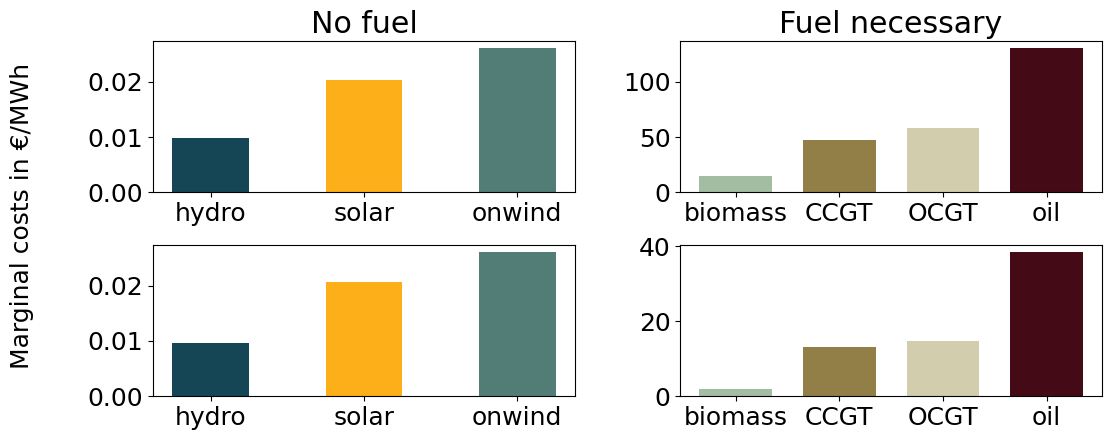

In [25]:
# Marginal costs of the network we look at
mc = n.generators.groupby('carrier').max().marginal_cost
mc_hydro = pd.Series(n.storage_units.marginal_cost.mean(),index = ['hydro'])
#print(f'Marginal costs of the three hydro storage units: {n.storage_units.marginal_cost}')

mc_total = pd.Series(mc)
mc_total = mc_total.append(mc_hydro).sort_values()
mc_total = mc_total.drop('load')
display(mc_total)

# Marginal costs of the reference network without subsidies

mc_ref = ref.generators.groupby('carrier').max().marginal_cost
mc_hydro_ref = pd.Series(ref.storage_units.marginal_cost.mean(),index = ['hydro'])
#print(f'Marginal costs of the three hydro storage units: {ref.storage_units.marginal_cost}')

mc_total_ref = pd.Series(mc_ref)
mc_total_ref = mc_total_ref.append(mc_hydro_ref).sort_values()
mc_total_ref = mc_total_ref.drop('load')
#display(mc_total_ref)


cap = n.generators.groupby('carrier').sum().p_nom_opt
cap = cap.drop('load')

cap_hydro = n.storage_units.p_nom_opt.sort_values(ascending = False)

width = cap_hydro.append(cap)

df = pd.DataFrame({'Capacity': width, 'Marginal Costs': mc_total})
sorted_df = df.sort_values(by='Marginal Costs')
print(mc_total_ref.index)
#fig, ax = plt.subplots(figsize = (10,4))

# Create the bar plot with different widths
#ax.bar(sorted_df.index, sorted_df['Marginal Costs'].values) #, width = sorted_df['Capacity'].values/2000
#print([mc_total['biomass'],mc_total['CCGT':'oil'].values])
# Set labels and title
# ax.set_xlabel('Carriers')
# ax.set_ylabel('€/MWh')
# ax.set_title('Marginal Costs')
# plt.show()
fig, axs = plt.subplots(2,2, figsize=(13,5))
plt.subplots_adjust(left=0.15, right=0.88, bottom=0.14, top=0.85, wspace=0.25, hspace=0.35)

axs[1,0].bar(['hydro','solar','onwind'] ,[mc_total['hydro'], mc_total['solar'],mc_total['onwind']], 
             color = [teal2,yellow,teal3],width=[0.5,0.5,0.5])


axs[1,1].bar(['biomass','CCGT','OCGT','oil'], [2,mc_total['CCGT'],mc_total['OCGT'], mc_total['oil']], #mc_total['biomass']
             color = [green3,beige1,beige3, brown], width=[0.7,0.7,0.7,0.7])


axs[0,0].bar(mc_total_ref.loc['hydro':'onwind'].index,mc_total_ref.loc['hydro':'onwind'], 
             color = [teal2,yellow,teal3],width=[0.5,0.5,0.5])
axs[0,0].set_title('No fuel')

axs[0,1].bar(mc_total_ref.loc['biomass':'oil'].index, mc_total_ref.loc['biomass':'oil'], 
             color = [green3,beige1,beige3, brown], width=[0.7,0.7,0.7,0.7])
axs[0,1].set_title('Fuel necessary')

fig.text(0.04, 0.5, 'Marginal costs in €/MWh', va='center', rotation='vertical')
#sorted_df['Capacity'].values/1000

plt.savefig(save_path+'marginal_cost_comparison.pdf', dpi=300, format='pdf', bbox_inches='tight')

## Emissions


In [29]:
n=val
emissions = n.generators_t.p / n.generators.efficiency * n.generators.carrier.map(n.carriers.co2_emissions) # t/h
n.snapshot_weightings.generators @ emissions.sum(axis=1).div(1e6) # Mt

#print('Emissions in 2021: ',emissions.sum(axis=1).sum(),' t CO2')
n.carriers.co2_emissions
n.generators_t.p
n.generators.carrier.map(n.carriers.co2_emissions)
emissions.sum().sum()/1000000

0.8462763961348739

In [260]:
n.carriers.co2_emissions

Carrier
geothermal   0.026000
OCGT         0.187000
coal         0.354000
nuclear      0.000000
CCGT         0.187000
biomass      0.000000
lignite      0.334000
oil          0.248000
hydro        0.000000
onwind       0.000000
solar        0.000000
PHS          0.000000
ror          0.000000
H2           0.000000
battery      0.000000
Load         0.000000
Name: co2_emissions, dtype: float64

In [106]:
n.cost()

AttributeError: 'Network' object has no attribute 'cost'

# Dispatch

CCGT  11215320.352044785
OCGT  1161577.0288710848
Oil   25784.486804184606
Wind  146655.7052348114
Solar  288592.21146966255
Biomass  574539.0836984758
Battery -1.4224732503009818e-16
Hydro 3195859.9131953954
Demand  -16609132.725793013


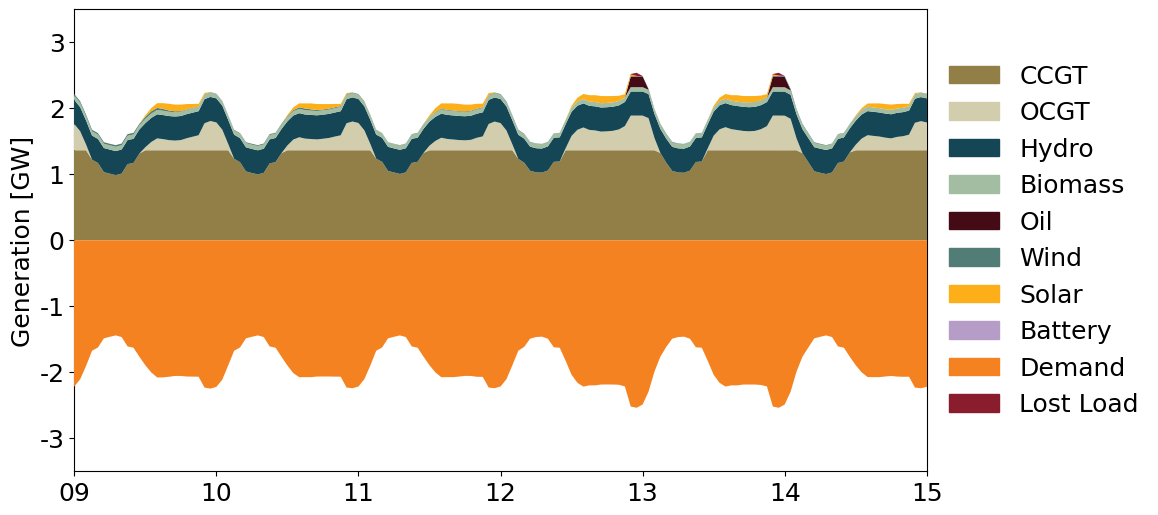

In [6]:
#n = val

# first_date = "2013-01-09"
# second_date = "2013-01-15"
first_date = "2013-01-01"
second_date = "2014-01-01"


CCGT = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["CCGT"]
print('CCGT ',CCGT.sum())

OCGT = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["OCGT"]
print('OCGT ',OCGT.sum())

Oil = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["oil"]
print('Oil  ',Oil.sum())

Onwind = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["onwind"]
print('Wind ',Onwind.sum())

solar = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["solar"]
print('Solar ',solar.sum())

biomass = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["biomass"]
print('Biomass ',biomass.sum())

#geothermal = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["geothermal"]
#print('Geothermal ',geothermal.sum())

#H2 = n.stores_t.p.loc[first_date:second_date].groupby(n.stores.carrier, axis=1).sum()["H2"]
#print('H2 ', H2.sum())

battery = n.stores_t.p.loc[first_date:second_date].groupby(n.stores.carrier, axis=1).sum()["battery"]
print('Battery', battery.sum())

Hydro = n.storage_units_t.p_dispatch[first_date:second_date].sum(axis=1)
print('Hydro', Hydro.sum())

#ror = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["ror"]
#print('ROR ',ror.sum())

demand = n.loads_t.p_set.loc[first_date:second_date].sum(axis=1)*-1
print('Demand ',demand.sum())
LL = (demand.values )*-1 - (CCGT + OCGT +Oil +Onwind +solar +biomass +Hydro)

fig, ax=plt.subplots(figsize = (11,6))
i=0
nbattery = []
pbattery =[]
for i in battery:
    if i < 0:
        nbattery.append(i)
    else:
        nbattery.append(0) 
for i in battery:
    if i > 0:
        pbattery.append(i)
    else:
        pbattery.append(0) 



#plt.figure(figsize=(8, 3))
A = plt.stackplot(CCGT.index,CCGT,OCGT,Hydro,biomass,Oil,Onwind, solar,pbattery,LL, #,pbattery
                  colors=[beige1,beige3,teal2,green3,brown,teal3,yellow, purple3,red1], zorder = 3) #,   purple3
plt.stackplot(CCGT.index,demand, nbattery, colors=[orange,purple3], zorder = 3) #,nbattery
plt.xticks(rotation = 0)
plt.yticks()
scale_y = 1e3
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)
myFmt = mdates.DateFormatter('%d')
ax.xaxis.set_major_formatter(myFmt)
#ax.set_xticks(np.arange(0,200))
ax.set_ylabel('Generation [GW]')
start_date = "2013-01-09"
end_date = "2013-01-15"

start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

ax.set_xlim(start_date, end_date)
ax.set_ylim(-3500, 3500)
#ax.set_title(scen,y = 1.03)

CCGT_patch = mpatches.Patch(color=beige1, label ='CCGT')
OCGT_patch = mpatches.Patch(color=beige3, label ='OCGT')
wind_patch = mpatches.Patch(color=teal3, label ='Wind')
solar_patch = mpatches.Patch(color=yellow, label ='Solar')
LL_patch = mpatches.Patch(color = red1, label = 'Lost Load')
#ror_patch = mpatches.Patch(color='blue', label ='ROR')
battery_patch = mpatches.Patch(color=purple3, label ='Battery')
load_patch = mpatches.Patch(color=orange, label ='Demand')
hydro_patch = mpatches.Patch(color = teal2, label = 'Hydro')
biomass_patch = mpatches.Patch(color = green3, label = 'Biomass')
oil_patch = mpatches.Patch(color = brown, label = 'Oil')
handles=[CCGT_patch,OCGT_patch,hydro_patch,biomass_patch,oil_patch,wind_patch, solar_patch,battery_patch, load_patch,LL_patch] #battery_patch,
ax.legend(handles=handles, frameon = False, loc='center left', bbox_to_anchor=(1, 0.5))

#plt.savefig(val_path +f'{case}_dispatch.pdf', dpi=300, bbox_inches='tight')
#plt.savefig(val_path +f'{case}_dispatch.png', dpi=300, bbox_inches='tight')




## RES Share

In [324]:
res_share = (Hydro.sum()+biomass.sum()+Onwind.sum()+solar.sum())/demand.sum()*(-1)
res_share*100 # in %

44.597663836171826

## Dispatch OSM PP

OCGT  5966145.003348868
Oil   12089.414230532884
Wind  25300.677831568835
Solar  191393.29848432253
Hydro 3247002.0102629154
Demand  -9455075.56149352


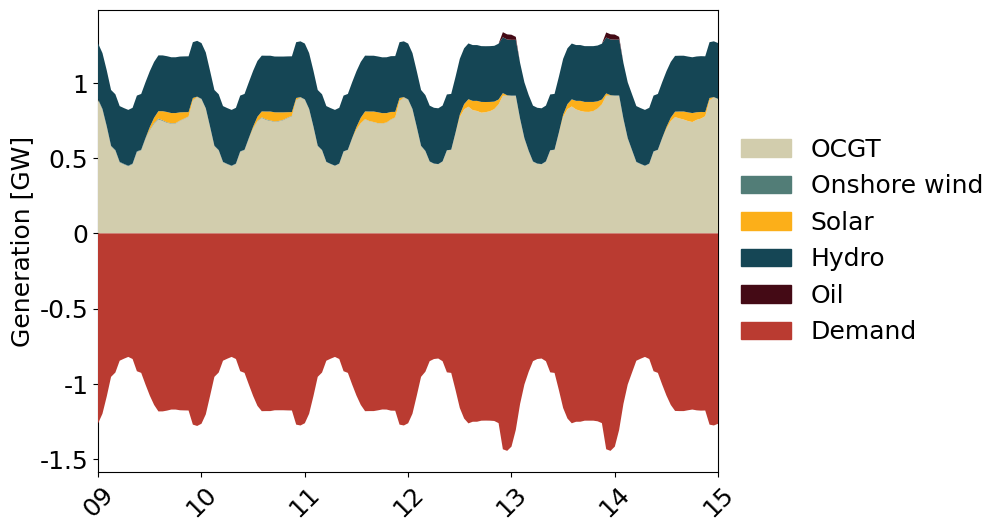

In [338]:
# No custom PP

n=val

first_date = "2013-01-01"
second_date = "2014-01-01"

# first_date = "2013-01-01"
# second_date = "2013-01-14"
#CCGT = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["CCGT"]
#print('CCGT ',CCGT.sum())

OCGT = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["OCGT"]
print('OCGT ',OCGT.sum())

Oil = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["oil"]
print('Oil  ',Oil.sum())

Onwind = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["onwind"]
print('Wind ',Onwind.sum())

solar = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["solar"]
print('Solar ',solar.sum())



#biomass = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["biomass"]
#print('Biomass ',biomass.sum())

#geothermal = n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["geothermal"]
#print('Geothermal ',geothermal.sum())

#H2 = n.stores_t.p.loc[first_date:second_date].groupby(n.stores.carrier, axis=1).sum()["H2"]
#print('H2 ', H2.sum())

#battery = n.stores_t.p.loc[first_date:second_date].groupby(n.stores.carrier, axis=1).sum()["battery"]
#print('Battery', battery.sum())

Hydro = n.storage_units_t.p_dispatch[first_date:second_date].sum(axis=1)+ n.generators_t.p.loc[first_date:second_date].groupby(n.generators.carrier, axis=1).sum()["ror"]
print('Hydro', Hydro.sum())

demand = n.loads_t.p_set.loc[first_date:second_date].sum(axis=1)*-1
print('Demand ',demand.sum())

LL = (demand.values *-1 - (CCGT + OCGT +Oil +Onwind +solar +biomass +Hydro +pbattery_9)

fig, ax=plt.subplots(figsize=(8, 6))
i=0
# nbattery = []
# pbattery =[]
# for i in battery:
#     if i < 0:
#         nbattery.append(i)
#     else:
#         nbattery.append(0) 
# for i in battery:
#     if i > 0:
#         pbattery.append(i)
#     else:
#         pbattery.append(0) 

#plt.figure(figsize=(8, 3))
A = plt.stackplot(OCGT.index,OCGT,Onwind, solar, Hydro,Oil, 
                  colors=[beige3,teal3,yellow, teal2,  brown], zorder = 3)
plt.stackplot(OCGT.index,demand, colors=[red2], zorder = 3)
plt.xticks(rotation = 45)
plt.yticks()
scale_y = 1e3
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)
myFmt = mdates.DateFormatter('%d')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel('Generation [GW]')
#ax.set_xlabel('Mar')

start_date = "2013-01-09"
end_date = "2013-01-15"

start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

ax.set_xlim(start_date, end_date)

#CCGT_patch = mpatches.Patch(color=beige1, label ='CCGT')
OCGT_patch = mpatches.Patch(color=beige3, label ='OCGT')
wind_patch = mpatches.Patch(color=teal3, label ='Onshore wind')
solar_patch = mpatches.Patch(color=yellow, label ='Solar')
#H2_patch = mpatches.Patch(color=purple1, label ='Hydrogen')
#battery_patch = mpatches.Patch(color=purple3, label ='Battery')
load_patch = mpatches.Patch(color=red2, label ='Demand')
hydro_patch = mpatches.Patch(color = teal2, label = 'Hydro')
#ror_patch = mpatches.Patch(color = 'blue', label = 'Run of River')
oil_patch = mpatches.Patch(color = brown, label = 'Oil')
handles=[OCGT_patch,wind_patch,solar_patch, hydro_patch, oil_patch,load_patch]
ax.legend(handles=handles, frameon = False, loc='center left', bbox_to_anchor=(1, 0.5))
#fig.savefig("path")

plt.savefig(val_path +f'Power_mix/val_{case}_dispatch.pdf', dpi=300, bbox_inches='tight')

# Power Mix with Battery

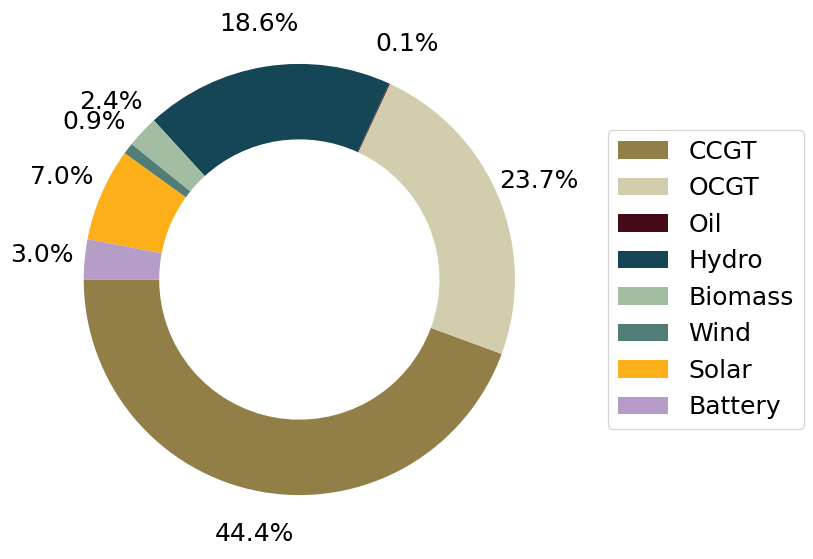

In [187]:
indices = ['CCGT','OCGT','Oil','Hydro','Biomass','Wind','Solar','Battery'] #'Battery',
data = [CCGT.sum(), OCGT.sum(), Oil.sum(),Hydro.sum(),biomass.sum(), Onwind.sum(),solar.sum(),sum(pbattery)] #battery.sum()
colors = [  beige1, beige3,brown, teal2,green3,teal3,yellow,purple3] #purple3,

Power_mix = pd.Series(data, index=indices)
Power_mix.plot.pie(labels = ['','','','','','', '','','',''], startangle=180,colors=colors,wedgeprops={'width': 0.35},autopct='%1.1f%%', pctdistance=1.2,
                   figsize=(12,7)) # autopct='%1.1f%%',

plt.legend(labels = indices, loc='center left', bbox_to_anchor=(1.05, 0.5))
leg = '_no_legend'
#leg =''
plt.savefig(scen_path+f'{scen}_power_mix{leg}_{year}_battery{direct}.pdf', dpi=300, format='pdf', bbox_inches='tight') # _no_legend

## Power Mix without battery

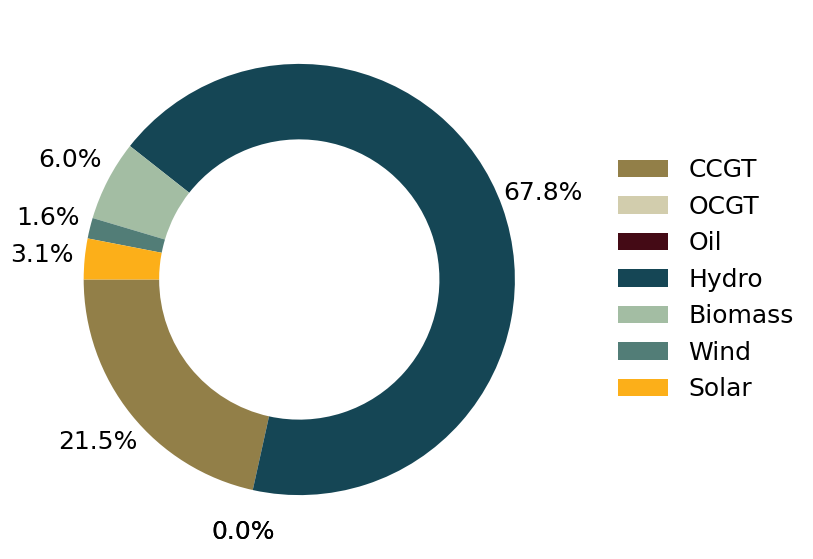

In [22]:
indices = ['CCGT','OCGT','Oil','Hydro','Biomass','Wind','Solar'] 
#indices = ['Hydro','Biomass','Wind','Solar'] 
data = [CCGT.sum(), OCGT.sum(), Oil.sum(),Hydro.sum(),biomass.sum(), Onwind.sum(),solar.sum()] 
#data = [Hydro.sum(),biomass.sum(), Onwind.sum(),solar.sum()] 
colors = [  beige1, beige3,brown, teal2,green3,teal3,yellow] 
#colors = [teal2,green3,teal3,yellow] 

Power_mix = pd.Series(data, index=indices)
Power_mix.plot.pie(labels = ['','','','','','', '','',''], startangle=180,colors=colors,wedgeprops={'width': 0.35},autopct='%1.1f%%', pctdistance=1.2,
                   figsize=(12,7)) # autopct='%1.1f%%',

plt.legend(labels = indices, loc='center left', bbox_to_anchor=(1.05, 0.5),frameon=False)
#leg = '_no_legend'
leg =''
#plt.savefig(scen_path+f'{case}_power_mix{leg}_{year}{direct}.pdf', dpi=300, format='pdf', bbox_inches='tight') # _no_legend
plt.savefig(val_path+f'{case}_power_mix{leg}.pdf', dpi=300, format='pdf', bbox_inches='tight') # _no_legend

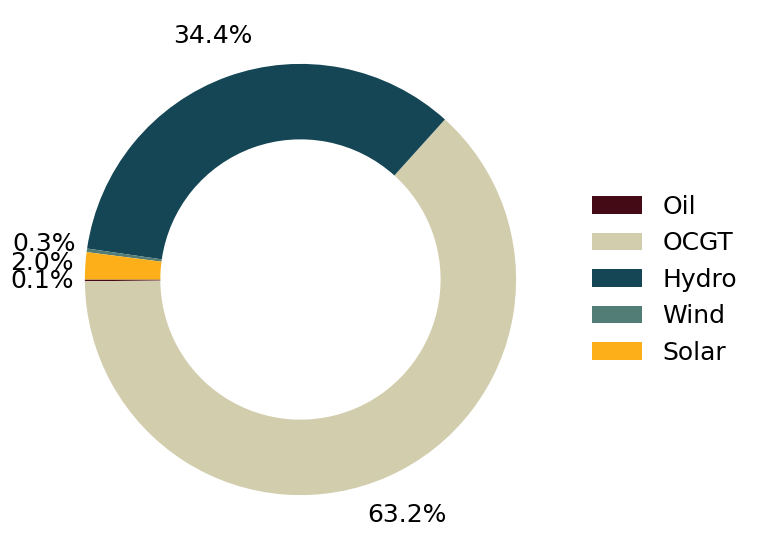

In [337]:
#plot for case 1

indices = ['Oil','OCGT','Hydro', 'Wind','Solar']
data = [Oil.sum(), OCGT.sum(), Hydro.sum(), Onwind.sum(),solar.sum()]
colors = [brown, beige3, teal2,teal3,yellow]

Power_mix = pd.Series(data, index=indices)
Power_mix.plot.pie(labels = ['','','','',''], startangle=180,colors=colors,wedgeprops={'width': 0.35},autopct='%1.1f%%', pctdistance=1.2,
                   figsize=(12,7)) # autopct='%1.1f%%',

plt.legend(labels = indices, loc='center left', bbox_to_anchor=(1.0, 0.5),frameon = False)
plt.savefig(val_path+f'power_mix/Power_mix_{case}.pdf', dpi=300, format='pdf', bbox_inches='tight') # _no_legend

# Average marginal costs

In [288]:
mc_mean = {'CCGT' : CCGT.sum()*mc_total['CCGT']/demand.sum()*(-1),
           'OCGT':  OCGT.sum()*mc_total['OCGT']/demand.sum()*(-1),
           'oil' :  Oil.sum()*mc_total['oil']/demand.sum()*(-1),
           'solar': solar.sum()*mc_total['solar']/demand.sum()*(-1),
           'onwind' :  Onwind.sum()*mc_total['onwind']/demand.sum()*(-1),
           'biomass' : biomass.sum()*mc_total['biomass']/demand.sum()*(-1),
           'hydro' :  Hydro.sum()*mc_total['hydro']/demand.sum()*(-1)
}

mc_mean


{'CCGT': 0.0,
 'OCGT': 0.0,
 'oil': 0.0,
 'solar': 0.01028800072913302,
 'onwind': 0.006525627846860697,
 'biomass': 0.12404550199224838,
 'hydro': 0.0019382126816348654}

In [32]:
mc_mean = {'CCGT' : CCGT.sum()*mc_total_ref['CCGT']/demand.sum()*(-1),
           'OCGT':  OCGT.sum()*mc_total_ref['OCGT']/demand.sum()*(-1),
           'oil' :  Oil.sum()*mc_total_ref['oil']/demand.sum()*(-1),
           'solar': solar.sum()*mc_total_ref['solar']/demand.sum()*(-1),
           'onwind' :  Onwind.sum()*mc_total_ref['onwind']/demand.sum()*(-1),
           'biomass' : biomass.sum()*mc_total_ref['biomass']/demand.sum()*(-1),
           'hydro' :  Hydro.sum()*mc_total_ref['hydro']/demand.sum()*(-1)
}

pd.Series(mc_mean).sum()

36.5690974713183

# Full load hours


In [8]:
n.statistics()

Capacity Factor  Capital Expenditure  \
            carrier                                                    
Generator   Biomass                9.899258e-01         6.477592e+07   
            Combined-Cycle Gas     2.235041e-01         1.152150e+08   
            Oil                    2.437921e-09         1.197506e+06   
            Onshore Wind           1.314690e-01         1.391770e+07   
            Open-Cycle Gas         1.665620e-09         4.482182e+07   
            Solar                  2.007358e-01         4.078927e+07   
            load                   3.411822e-15         0.000000e+00   
Line        AC                     1.329980e-01         2.374421e+07   
Link        battery charger        2.982601e-01         3.582488e-01   
            battery discharger     2.415907e-01         0.000000e+00   
Load        -                               NaN                  NaN   
StorageUnit Reservoir & Dam        5.000000e-01         1.176112e+08   
Store       Battery Storage        4.999940e-01         2.916004e-01   

                                Curtailment      Dispatch  Installed Capacity  \
            carrier                                                             
Generator   Biomass                0.000000  2.020466e+06        6.558000e+01   
            Combined-Cycle Gas     0.000000  2.670550e+06        1.363990e+03   
            Oil                    0.000000  6.688758e-04        3.132000e+01   
            Onshore Wind           0.115741  1.466534e+05        1.273400e+02   
            Open-Cycle Gas         0.000000  1.384553e-02        9.489200e+02   
            Solar                  0.415006  1.410370e+06        1.649000e+02   
            load                   0.000000  1.195502e-04        4.000000e+09   
Line        AC                          NaN -1.732741e+06        3.440892e+03   
Link        battery charger             NaN -2.430727e-02        0.000000e+00   
            battery discharger          NaN -2.187654e-02        0.000000e+00   
Load        -                           NaN -9.455076e+06                 NaN   
StorageUnit Reservoir & Dam        0.000000  3.207036e+06        7.322000e+02   
Store       Battery Storage             NaN  8.639736e-20        0.000000e+00   

                                Market Value  Operational Expenditure  \
            carrier                                                     
Generator   Biomass             3.420712e+01             4.338405e+06   
            Combined-Cycle Gas  3.595262e+01             3.271643e+07   
            Oil                 3.476948e+01             2.567115e-02   
            Onshore Wind        3.218271e+01             3.636645e+03   
            Open-Cycle Gas      3.553580e+01             1.879437e-01   
            Solar               2.890235e+01             2.880390e+04   
            load                3.394938e+04             1.207151e-01   
Line        AC                 -7.570420e-05                      NaN   
Link        battery charger     1.006672e+00             0.000000e+00   
            battery discharger  3.672294e+00             0.000000e+00   
Load        -                  -3.376791e+01                      NaN   
StorageUnit Reservoir & Dam     3.388414e+01             3.399944e+04   
Store       Battery Storage    -7.597037e+18             2.764438e-21   

                                Optimal Capacity       Revenue        Supply  \
            carrier                                                            
Generator   Biomass                 2.329940e+02  6.911433e+07  2.020466e+06   
            Combined-Cycle Gas      1.363990e+03  9.601327e+07  2.670550e+06   
            Oil                     3.132000e+01  2.325647e-02  6.688758e-04   
            Onshore Wind            1.273400e+02  4.719704e+06  1.466534e+05   
            Open-Cycle Gas          9.489200e+02  4.920122e-01  1.384553e-02   
            Solar                   8.020550e+02  4.076301e+07  1.410370e+06   

In [14]:
# Generated power / installed capacity

df = n.statistics()['Optimal Capacity']
bio_cap = df['Generator','Biomass']
ccgt_cap = df['Generator','Combined-Cycle Gas']
ocgt_cap = df['Generator','Open-Cycle Gas']
oil_cap = df['Generator','Oil']
wind_cap = df['Generator','Onshore Wind']
solar_cap = df['Generator','Solar']
hydro_cap = df['StorageUnit','Reservoir & Dam']

FLH_bio = biomass.sum()/bio_cap/8760
FLH_ccgt = CCGT.sum()/ccgt_cap/8760
FLH_ocgt = OCGT.sum()/ocgt_cap/8760
FLH_oil = Oil.sum()/oil_cap/8760
FLH_wind = Onwind.sum()/wind_cap/8760
FLH_solar = solar.sum()/solar_cap/8760
FLH_hydro = Hydro.sum()/hydro_cap/8760

print(FLH_bio)
print(FLH_ccgt)
print(FLH_ocgt)
print(FLH_oil)
print(FLH_wind)
print(FLH_solar)
print(FLH_hydro)
df


0.9899257566592332
0.22350406391640137
1.6656202162436877e-09
2.4379210189144915e-09
0.1314689597831164
0.20073580938136515
0.49999999925307065


             carrier           
Generator    Biomass               2.329940e+02
             Combined-Cycle Gas    1.363990e+03
             Oil                   3.132000e+01
             Onshore Wind          1.273400e+02
             Open-Cycle Gas        9.489200e+02
             Solar                 8.020550e+02
             load                  4.000000e+09
Line         AC                    1.992095e+03
Link         battery charger       9.303299e-06
             battery discharger    1.033700e-05
Load         -                              NaN
StorageUnit  Reservoir & Dam       7.322000e+02
Store        Battery Storage       1.836520e-05
Name: Optimal Capacity, dtype: float64

In [12]:
n.storage_units.p_max_pu

StorageUnit
BO 0 hydro    0.5
BO 2 hydro    0.5
BO 3 hydro    0.5
Name: p_max_pu, dtype: float64

In [7]:
display(biomass.sum())
display(CCGT.sum())
display(OCGT.sum())
display(Oil.sum())
display(Onwind.sum())
display(solar.sum())
display(Hydro.sum())

2020466.0189139177

2670550.019318071

0.01384553333983813

0.0006688758120966405

146653.41543636136

1410370.102617978

3207035.9952091416

Generator
BO 0 onwind    0.110622
BO 0 solar     0.200999
BO 1 onwind    0.050782
BO 1 solar     0.157931
BO 2 onwind    0.149341
BO 2 solar     0.140397
BO 3 onwind    0.063377
BO 3 solar     0.199033
dtype: float64

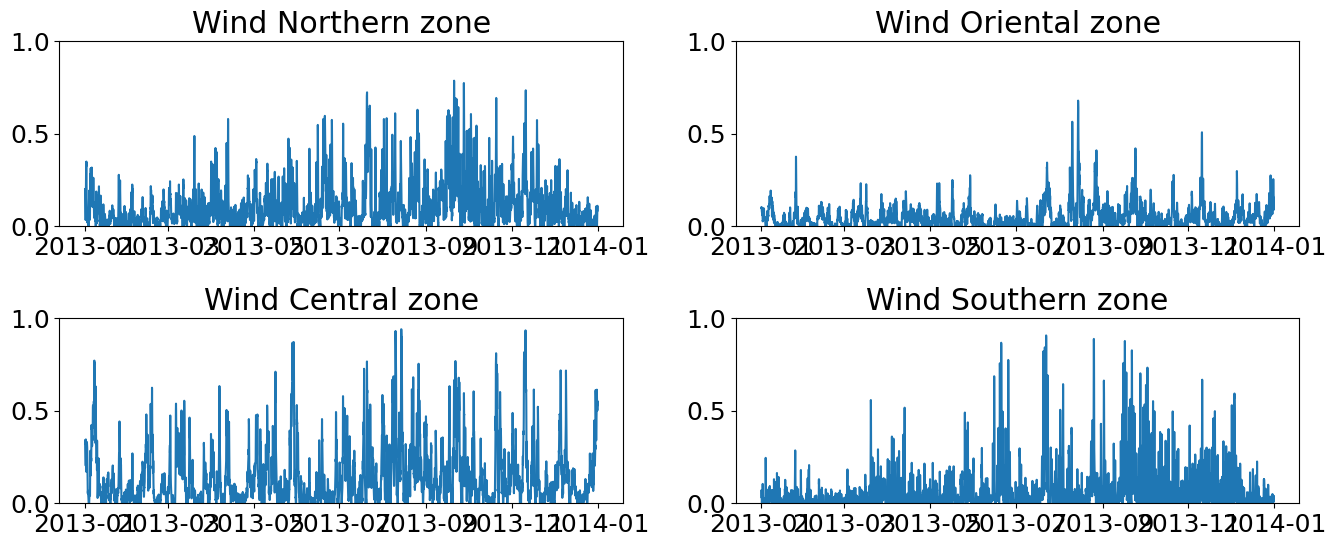

In [71]:
fig, axs = plt.subplots(2,2, figsize=(16,6))


axs[0, 0].plot(n.generators_t.p_max_pu['BO 0 onwind'])
axs[0, 0].set_title('Wind Northern zone')
axs[0, 0].set_ylim(0, 1)

axs[0, 1].plot(n.generators_t.p_max_pu['BO 1 onwind'])
axs[0, 1].set_title('Wind Oriental zone')
axs[0, 1].set_ylim(0, 1)

axs[1, 0].plot(n.generators_t.p_max_pu['BO 2 onwind'])
axs[1, 0].set_title('Wind Central zone')
axs[1, 0].set_ylim(0, 1)

axs[1, 1].plot(n.generators_t.p_max_pu['BO 3 onwind'])
axs[1, 1].set_title('Wind Southern zone')
axs[1, 1].set_ylim(0, 1)

plt.subplots_adjust(hspace=0.5)


In [179]:

n.generators_t.p_max_pu.describe()



Generator,BO 0 onwind,BO 0 solar,BO 1 onwind,BO 1 solar,BO 2 onwind,BO 2 solar,BO 3 onwind,BO 3 solar
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,0.110622,0.200999,0.050782,0.157931,0.149341,0.140397,0.063377,0.199033
std,0.123523,0.255078,0.064128,0.204668,0.166824,0.188791,0.115957,0.253744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.026937,0.000000,0.000000,0.000000,0.030725,0.000000,0.000000,0.000000
50%,0.066681,0.000000,0.033644,0.000000,0.089789,0.000000,0.022094,0.000000
75%,0.151659,0.444908,0.072988,0.335097,0.209787,0.279346,0.067922,0.438333
max,0.786732,0.763855,0.678908,0.669330,0.941714,0.655997,0.908266,0.751953


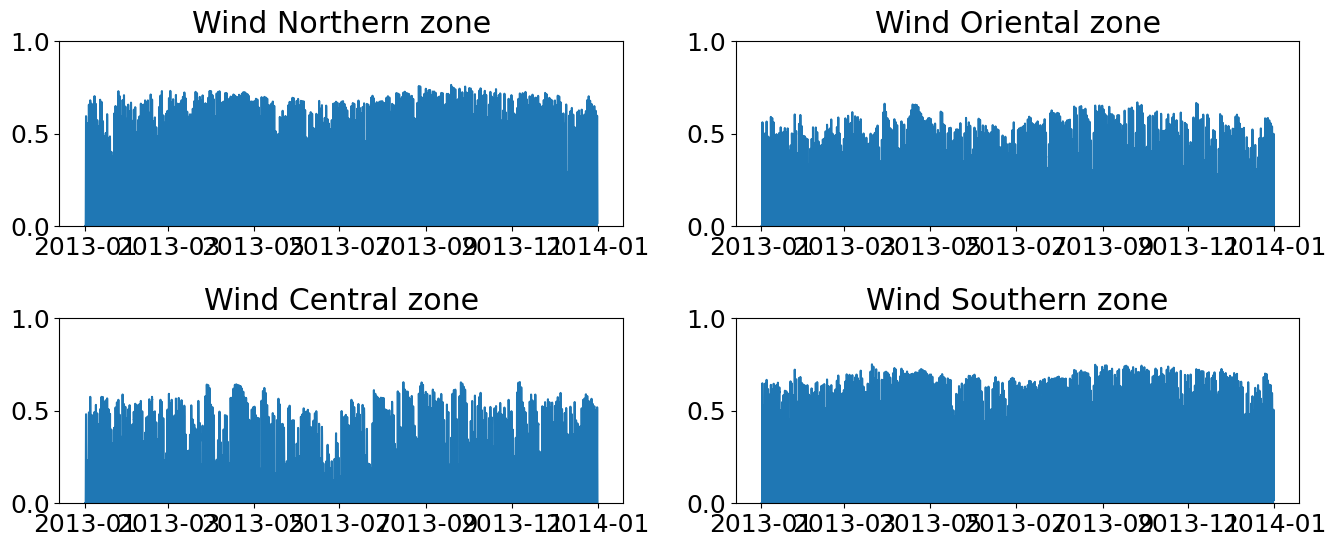

In [72]:
fig, axs = plt.subplots(2,2, figsize=(16,6))


axs[0, 0].plot(n.generators_t.p_max_pu['BO 0 solar'])
axs[0, 0].set_title('Wind Northern zone')
axs[0, 0].set_ylim(0, 1)

axs[0, 1].plot(n.generators_t.p_max_pu['BO 1 solar'])
axs[0, 1].set_title('Wind Oriental zone')
axs[0, 1].set_ylim(0, 1)

axs[1, 0].plot(n.generators_t.p_max_pu['BO 2 solar'])
axs[1, 0].set_title('Wind Central zone')
axs[1, 0].set_ylim(0, 1)

axs[1, 1].plot(n.generators_t.p_max_pu['BO 3 solar'])
axs[1, 1].set_title('Wind Southern zone')
axs[1, 1].set_ylim(0, 1)

plt.subplots_adjust(hspace=0.5)

Generator
BO 0 CCGT       0.64
BO 0 OCGT       0.64
BO 0 onwind     1.00
BO 0 solar      1.00
BO 1 OCGT       0.64
BO 1 biomass    0.72
BO 1 oil        1.00
BO 1 onwind     1.00
BO 1 solar      1.00
BO 2 CCGT       0.64
BO 2 OCGT       0.64
BO 2 biomass    0.72
BO 2 onwind     1.00
BO 2 solar      1.00
BO 3 OCGT       0.64
BO 3 onwind     1.00
BO 3 solar      1.00
BO 0 load       1.00
BO 1 load       1.00
BO 2 load       1.00
BO 3 load       1.00
Name: p_max_pu, dtype: float64

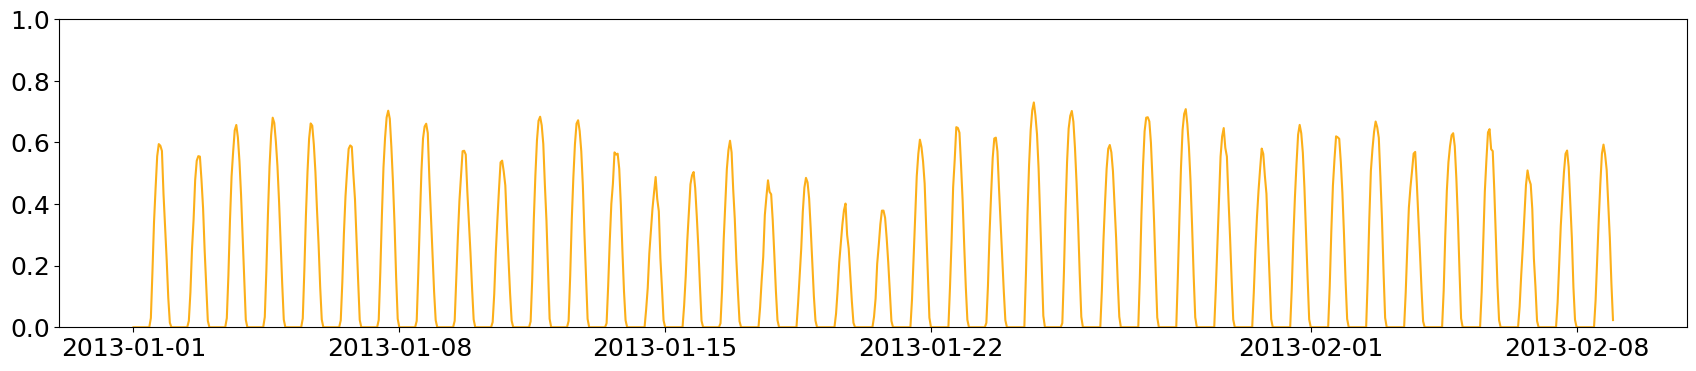

In [73]:
first_date = "2013-01-01"
second_date = "2013-02-08"

plt.figure(figsize = (21,4))
plt.plot(n.generators_t.p_max_pu['BO 0 solar'].loc[first_date:second_date],color = yellow)
plt.ylim(0,1)
n.generators_t.p_max_pu['BO 0 solar']
n.generators.p_max_pu





# Further analysis
The following notebooks provide additional analysis, plots and validation of the networks:

[Plot osm network](./0_build_osm_network_plot.ipynb)

[Explore network](./0_network_exploration.ipynb)

[Check outputs of build_shapes script](./0build_shapes.ipynb)

[Compare shapes for countries](./0shape_comparison.ipynb)

[Check base network](./base_network.ipynb)

[Check outputs of add_electricity script](./add_electricity.ipynb)

[Check outputs of augmented_line_connections script](./augmented_line_connections.ipynb)

[Test the built cutouts](./build_cutout.ipynb)

[Test the renewable profiles](./build_renewable_profiles.ipynb)

[Check land use availability](./land_use_availability.ipynb)

[Check network characteristics before solving](./network_characteristics_before_solve.ipynb)

[Some nice plots for presentations](./nice_plotting_for_presentations.ipynb)

[Download OSM and make adjustments](./openstreetmap_download_and_adjustments.ipynb)

[Visualise clustering](./visualise_clustering.ipynb)

The following notebooks could be used for validation:

[Capacity validation](./capacity_validation.ipynb)

[Demand validation](./demand_validation.ipynb)

[Hydro generation validation](./hydro_generation_validation.ipynb)

[Network validation](./network_validation.ipynb)

[Renewable potential validation](./renewable_potential_validation.ipynb)




# Checks

In [85]:
n.links.p_nom_max

Link
BO 0 battery charger      inf
BO 1 battery charger      inf
BO 2 battery charger      inf
BO 3 battery charger      inf
BO 0 battery discharger   inf
BO 1 battery discharger   inf
BO 2 battery discharger   inf
BO 3 battery discharger   inf
Name: p_nom_max, dtype: float64